In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('filmtv_movies.csv')
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [3]:
# Take values only year after 1999 in the column 'year'
df = df[df['year'] > 1999]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20820 entries, 1698 to 40298
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     20820 non-null  int64  
 1   title         20820 non-null  object 
 2   year          20820 non-null  int64  
 3   genre         20772 non-null  object 
 4   duration      20820 non-null  int64  
 5   country       20813 non-null  object 
 6   directors     20800 non-null  object 
 7   actors        19305 non-null  object 
 8   avg_vote      20820 non-null  float64
 9   critics_vote  16950 non-null  float64
 10  public_vote   20492 non-null  float64
 11  total_votes   20820 non-null  int64  
 12  description   20631 non-null  object 
 13  notes         8159 non-null   object 
 14  humor         20820 non-null  int64  
 15  rhythm        20820 non-null  int64  
 16  effort        20820 non-null  int64  
 17  tension       20820 non-null  int64  
 18  erotism       20820 non

In [5]:
df.isnull().sum()

filmtv_id           0
title               0
year                0
genre              48
duration            0
country             7
directors          20
actors           1515
avg_vote            0
critics_vote     3870
public_vote       328
total_votes         0
description       189
notes           12661
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64

In [6]:
# Drop columns 'description' and 'notes' 
df.drop(['description', 'notes'], axis=1, inplace=True)
# Drop rows of columns 'actors', 'public_votes' and 'critics_votes' with null values
df.dropna(subset=['actors', 'public_vote', 'critics_vote'], inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15412 entries, 1698 to 40294
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     15412 non-null  int64  
 1   title         15412 non-null  object 
 2   year          15412 non-null  int64  
 3   genre         15373 non-null  object 
 4   duration      15412 non-null  int64  
 5   country       15409 non-null  object 
 6   directors     15400 non-null  object 
 7   actors        15412 non-null  object 
 8   avg_vote      15412 non-null  float64
 9   critics_vote  15412 non-null  float64
 10  public_vote   15412 non-null  float64
 11  total_votes   15412 non-null  int64  
 12  humor         15412 non-null  int64  
 13  rhythm        15412 non-null  int64  
 14  effort        15412 non-null  int64  
 15  tension       15412 non-null  int64  
 16  erotism       15412 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 2.1+ MB


In [7]:
# Removing the duplicates if any
duplicates = df.duplicated()
print(duplicates)
print("Number of duplicates:", duplicates.sum())
df.drop_duplicates(inplace=True)

1698     False
12186    False
12273    False
12298    False
12300    False
         ...  
40277    False
40278    False
40284    False
40286    False
40294    False
Length: 15412, dtype: bool
Number of duplicates: 0


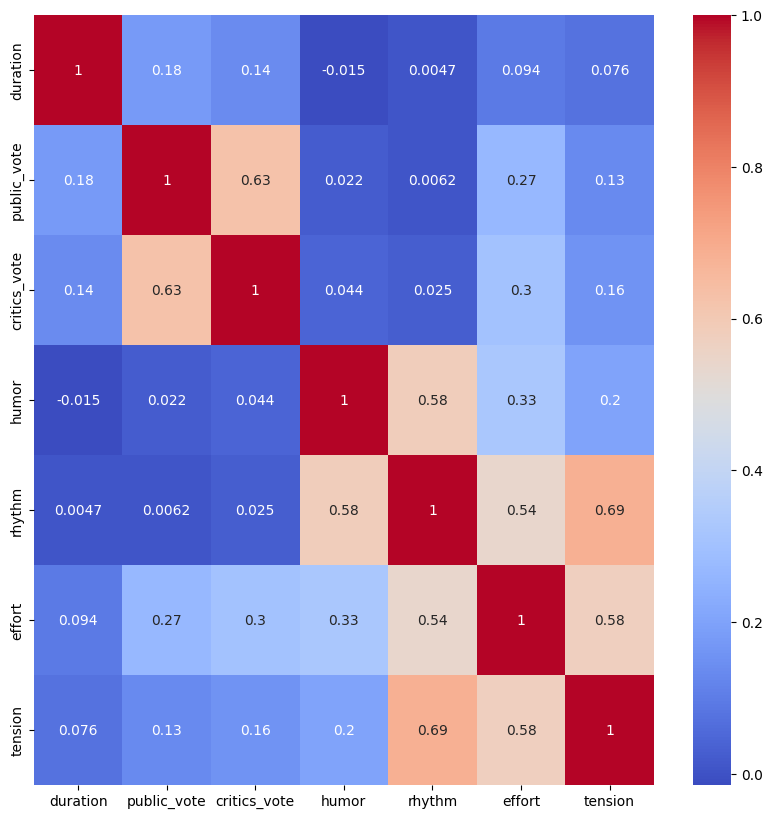

In [8]:
# Make a df_corr with columns 'public_vote', 'critics_vote', 'duration', 'year' , 'humor', 'rythom' , 'effort', 'effort', 'tension' 
df_corr = df[['year','duration','public_vote', 'critics_vote'  , 'humor', 'rhythm', 'effort', 'tension']]
# set index to 'year'
df_corr.set_index('year', inplace=True)
# Make a correlation matrix
corr = df_corr.corr()
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

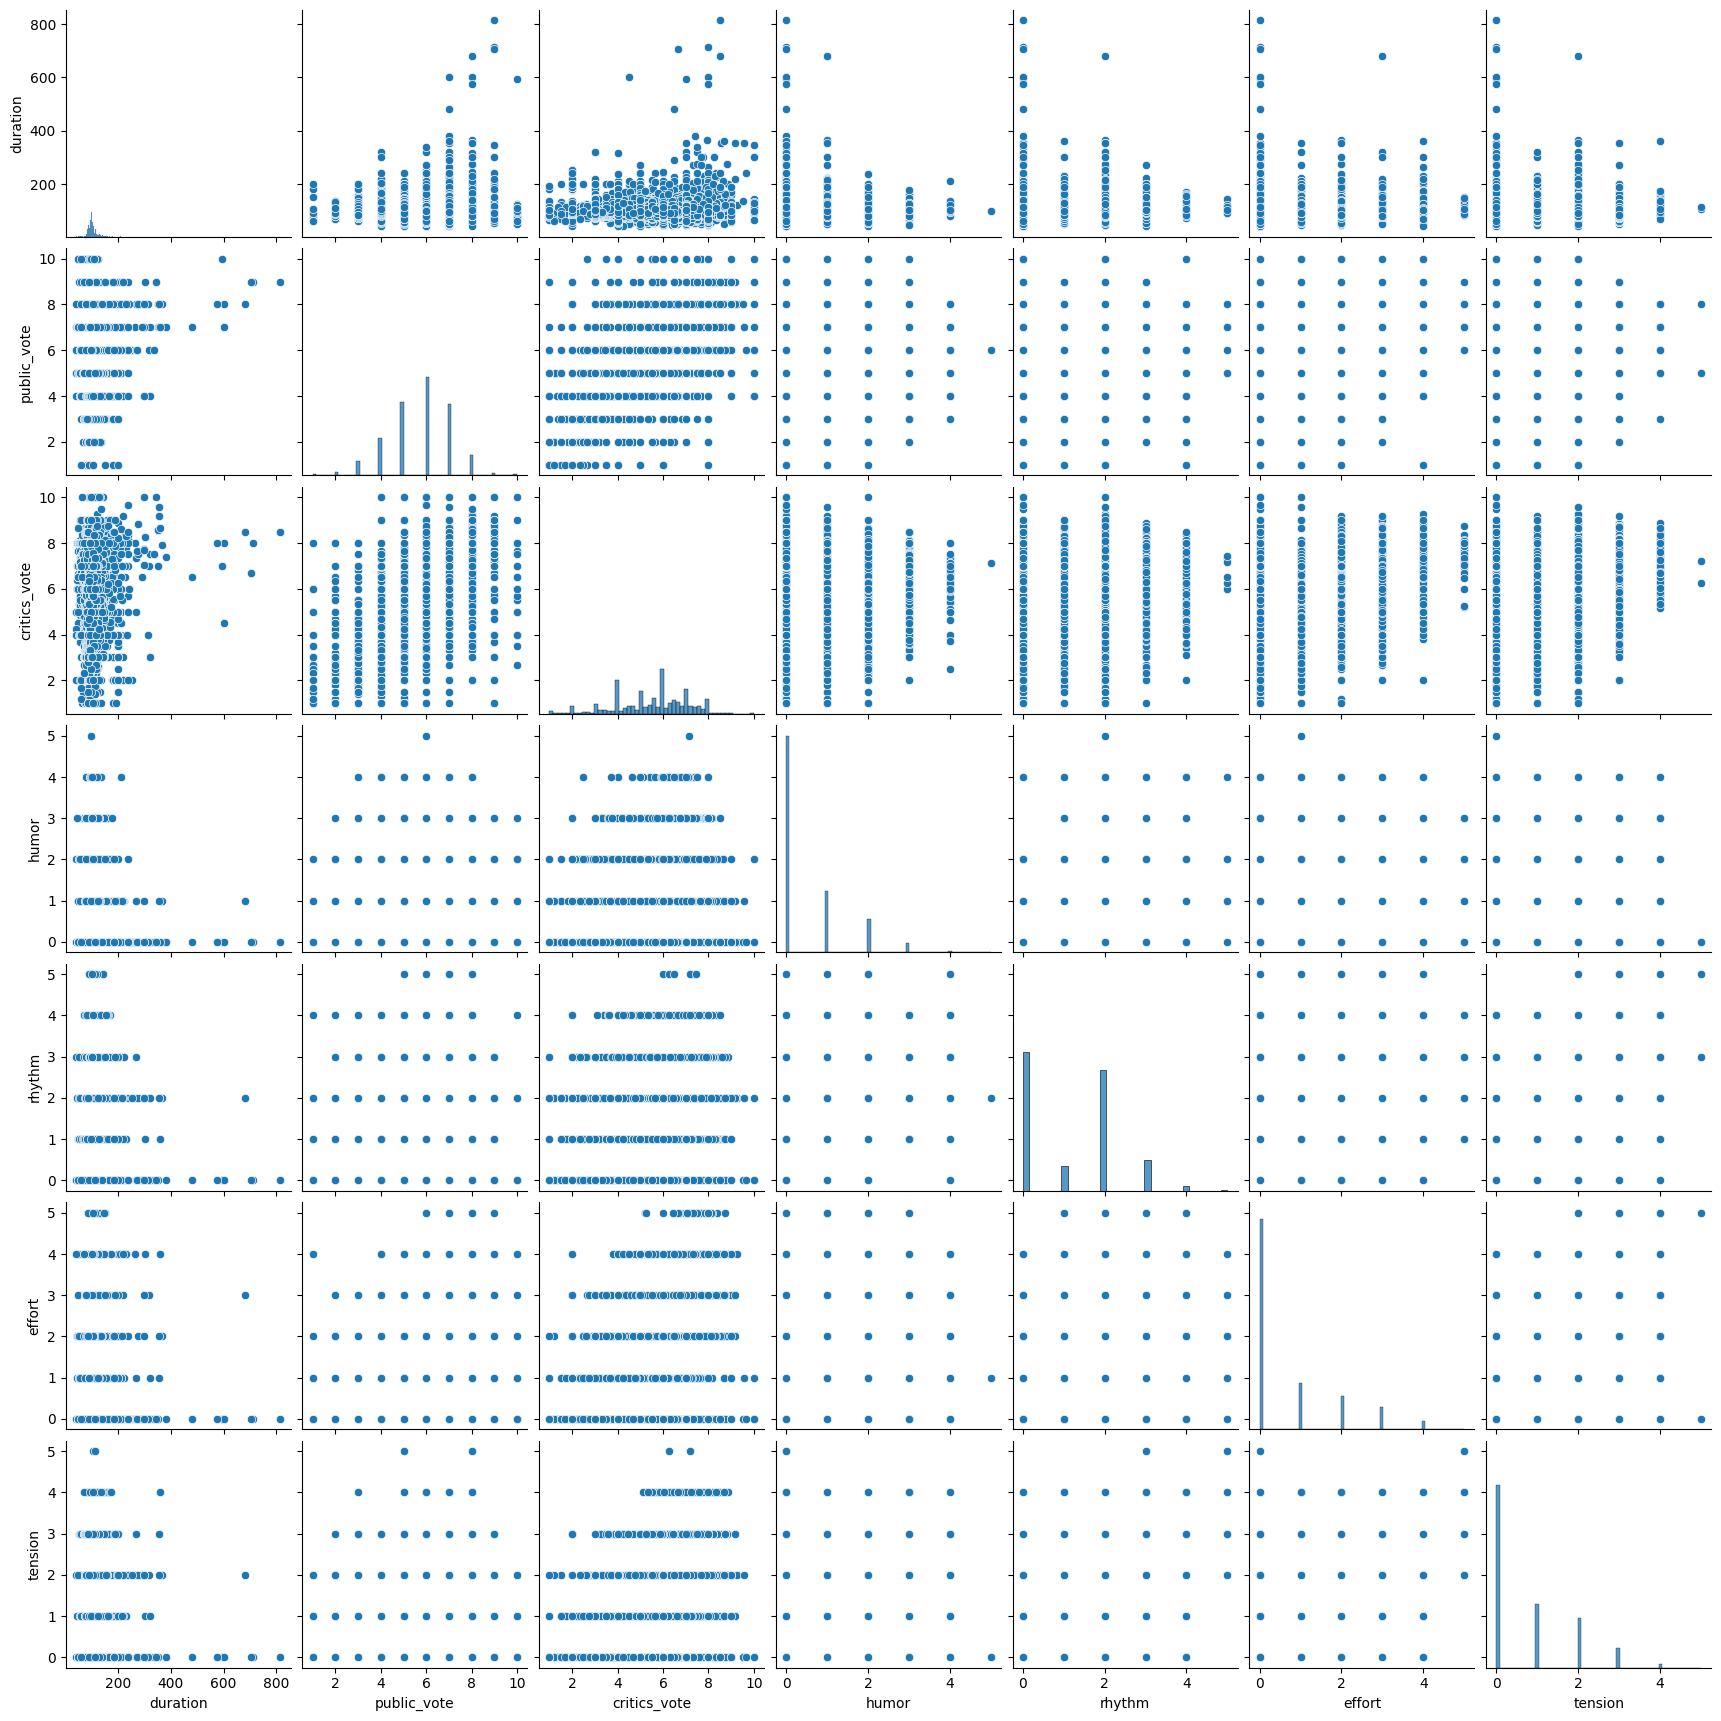

In [9]:
# Plotting the pairplot
sns.pairplot(df_corr)
plt.show()

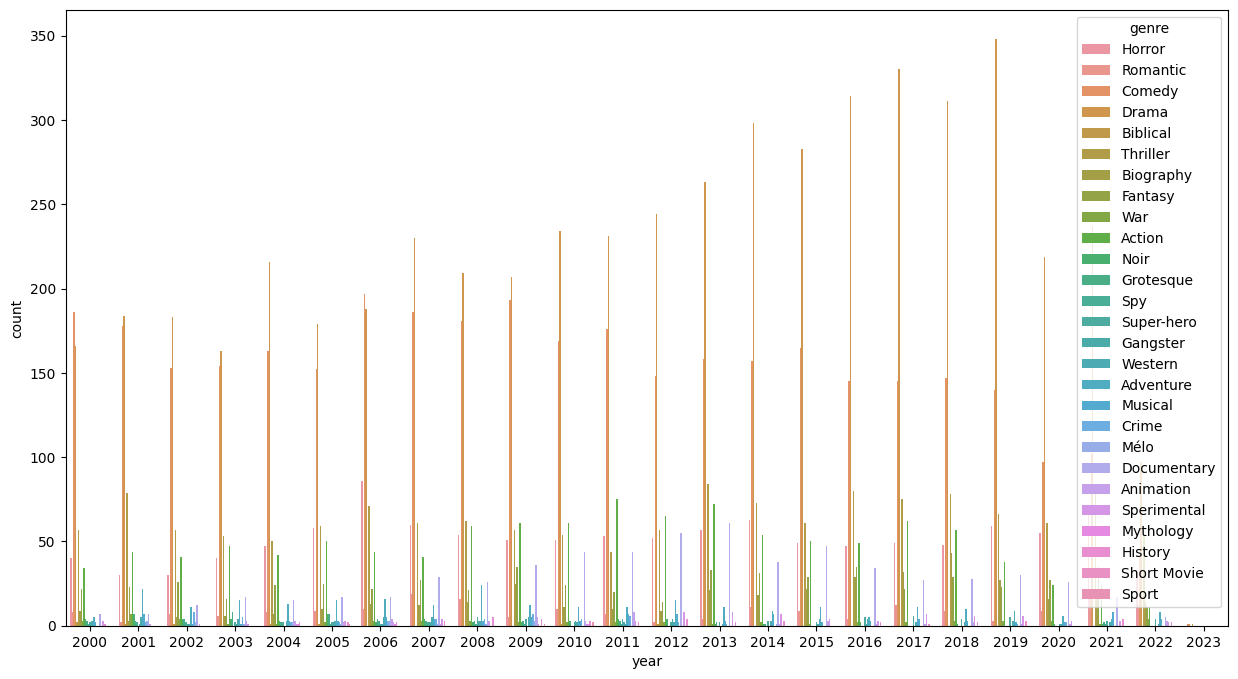

In [10]:
# Draw a plot to show total movies released in each year with hue as 'genre'
plt.figure(figsize=(15, 8))
sns.countplot(x='year', hue='genre', data=df)
plt.show()